# Exploratory Data Analysis

For a better understanding of the local players we have available in the Singaporean Premier League, it is integral to run some data analyses on what we have managed to obtain from data scraping (03-scraping)

### Contents

- [Basic Information](#Basic-Information)
- [Columns with Missing Values](#Columns-with-Missing-Values)
- [Summary Statistics](#Summary-Statistics)
- [Histograms](#Histograms)
- [Correlation Matrix](#Correlation-Matrix)
- [Column Charts](#Column-Charts)
- [Pairplots](#Pairplots)

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = '../data/players_df_sin_eda.csv'
df = pd.read_csv(file_path)

### Basic Information

In [4]:
# Basic information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player Name               114 non-null    object 
 1   NATIONALITY               114 non-null    object 
 2   HEIGHT                    97 non-null     object 
 3   PREFERRED FOOT            92 non-null     object 
 4   SHIRT NUMBER              112 non-null    float64
 5   POSITION                  114 non-null    object 
 6   Goals per game            114 non-null    float64
 7   Assists                   114 non-null    int64  
 8   Accurate per game         114 non-null    float64
 9   Acc. long balls           114 non-null    float64
 10  Acc. crosses              114 non-null    float64
 11  Interceptions per game    114 non-null    float64
 12  Balls recovered per game  114 non-null    float64
 13  Dribbled past per game    114 non-null    f

### Columns with Missing Values

In [5]:
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Player Name                  0
NATIONALITY                  0
HEIGHT                      17
PREFERRED FOOT              22
SHIRT NUMBER                 2
POSITION                     0
Goals per game               0
Assists                      0
Accurate per game            0
Acc. long balls              0
Acc. crosses                 0
Interceptions per game       0
Balls recovered per game     0
Dribbled past per game       0
Clearances per game          0
Succ. dribbles               0
Total duels won              0
Aerial duels won             0
Clean sheets                53
Saves per game              97
dtype: int64


Two key things to note here. Clean sheet data is only available for keepers and defenders, while saves per game naturally are only available for keepers.

### Summary Statistics

In [6]:
# Summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       SHIRT NUMBER  Goals per game     Assists  Accurate per game  \
count    112.000000      114.000000  114.000000         114.000000   
mean      19.035714        0.050000    0.535088           0.792895   
std       14.523624        0.109907    1.090424           0.143919   
min        1.000000        0.000000    0.000000           0.000000   
25%        7.750000        0.000000    0.000000           0.762500   
50%       17.000000        0.000000    0.000000           0.820000   
75%       24.000000        0.000000    1.000000           0.870000   
max       80.000000        0.600000    6.000000           1.000000   

       Acc. long balls  Acc. crosses  Interceptions per game  \
count       114.000000    114.000000              114.000000   
mean          0.476228      0.230263                1.983333   
std           0.282443      0.258102                1.622569   
min           0.000000      0.000000                0.000000   
25%           0.350000      

### Histograms

We run some histograms to see the overall distribution of of the stats across all Singaporean players.

In [7]:
# Checking the distribution of numerical features
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical Columns: {numerical_columns}")


Numerical Columns: ['SHIRT NUMBER', 'Goals per game', 'Assists', 'Accurate per game', 'Acc. long balls', 'Acc. crosses', 'Interceptions per game', 'Balls recovered per game', 'Dribbled past per game', 'Clearances per game', 'Succ. dribbles', 'Total duels won', 'Aerial duels won', 'Clean sheets', 'Saves per game']


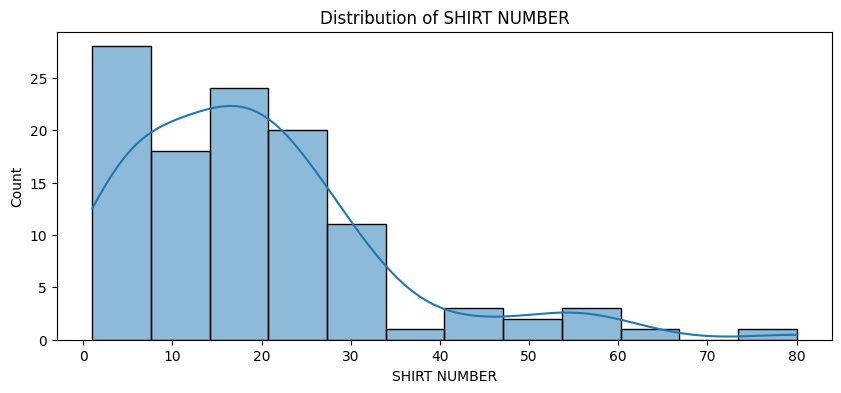

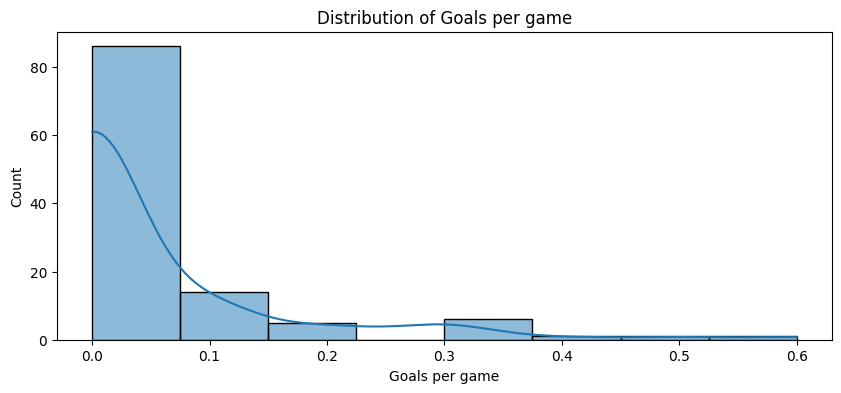

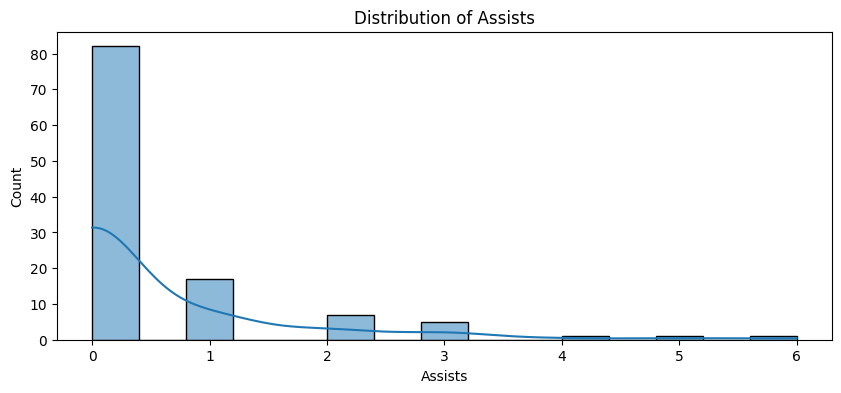

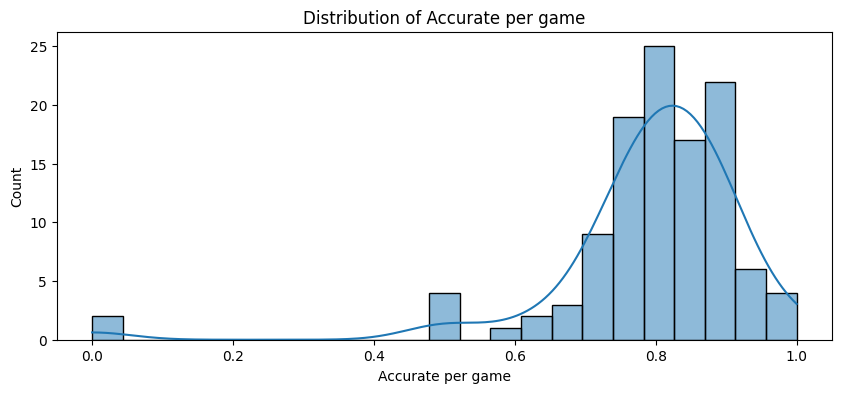

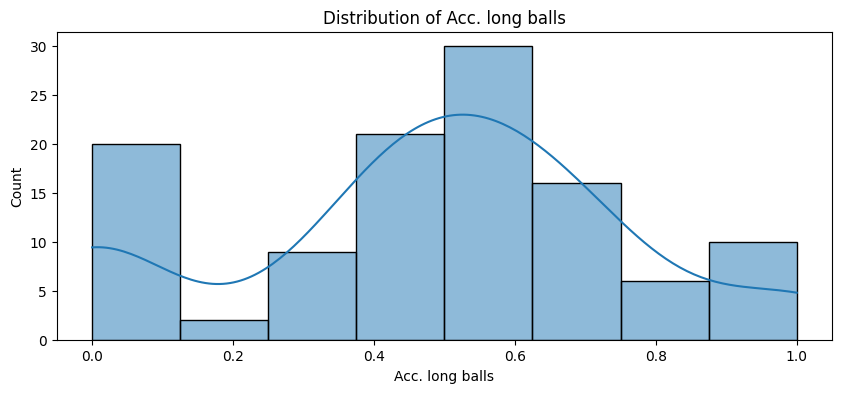

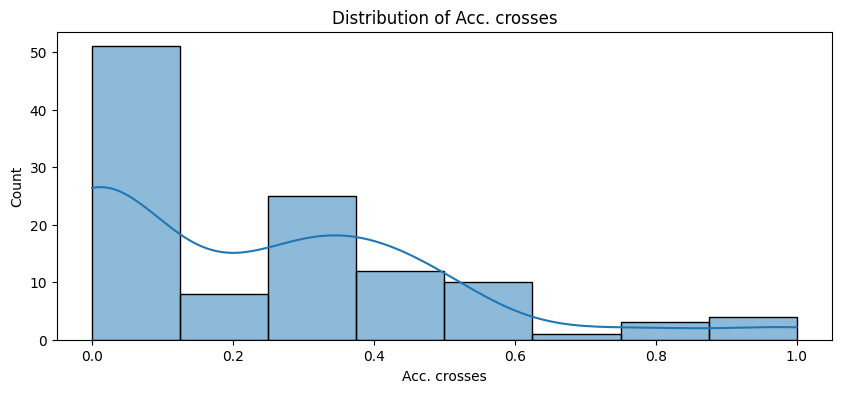

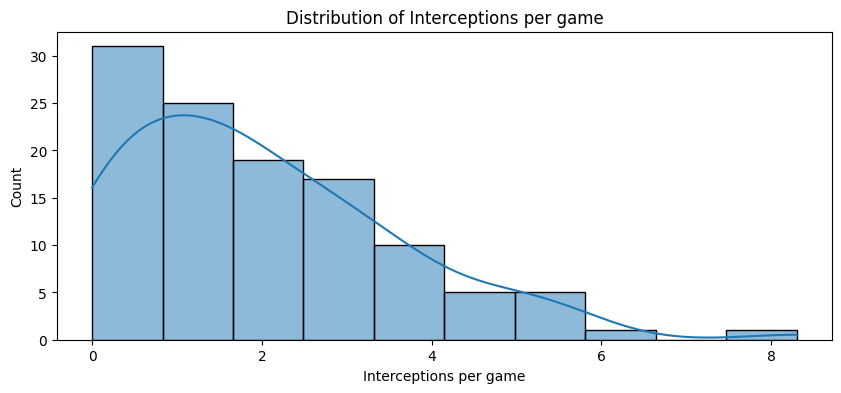

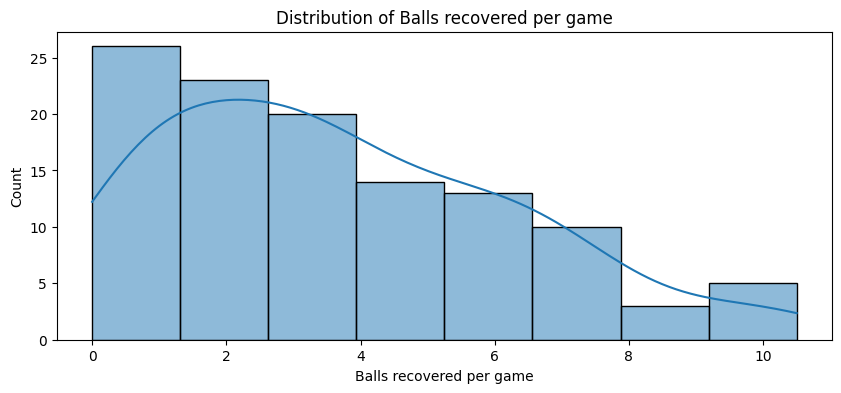

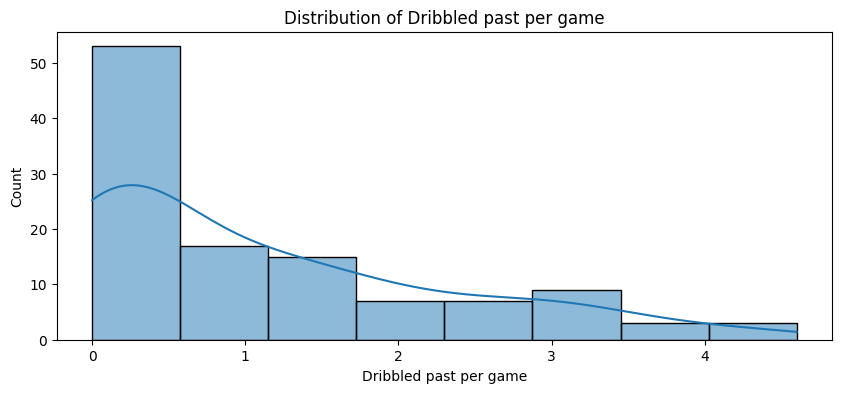

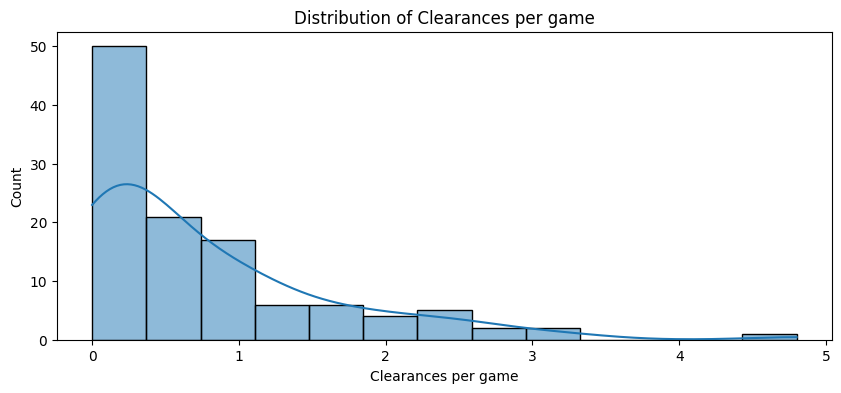

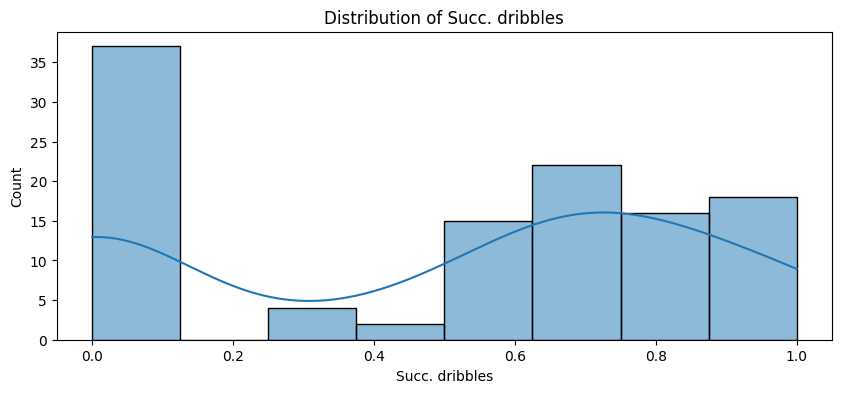

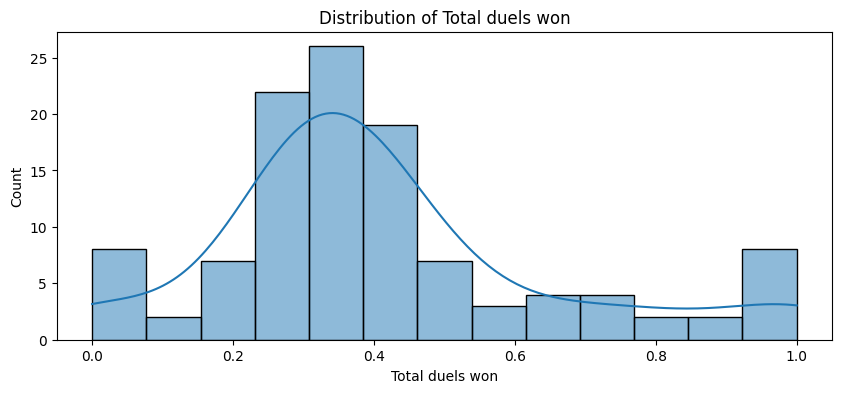

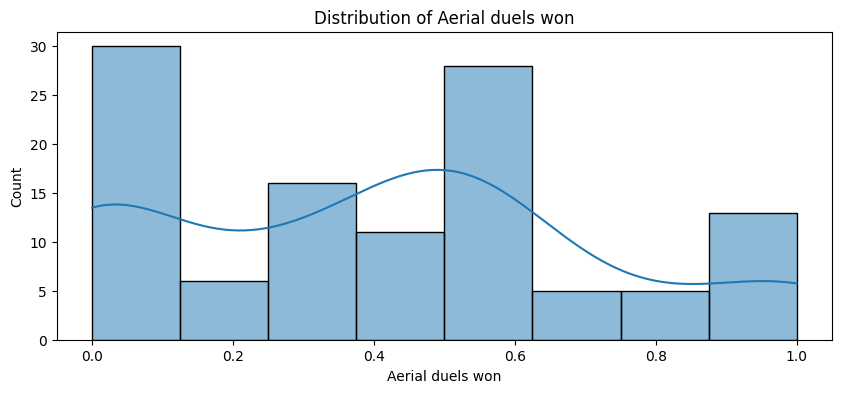

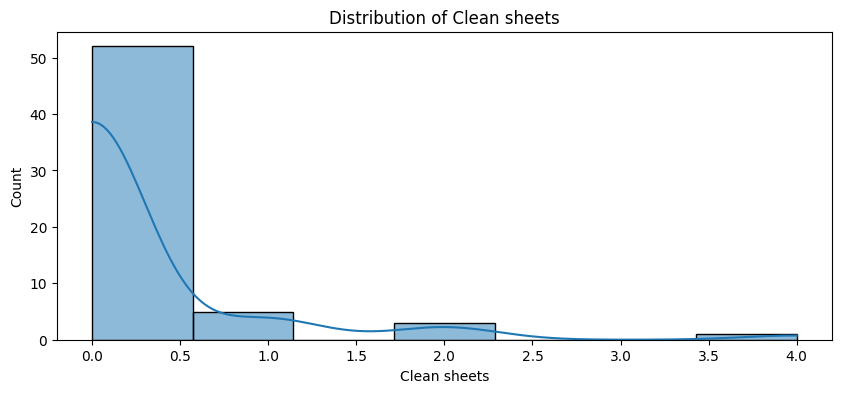

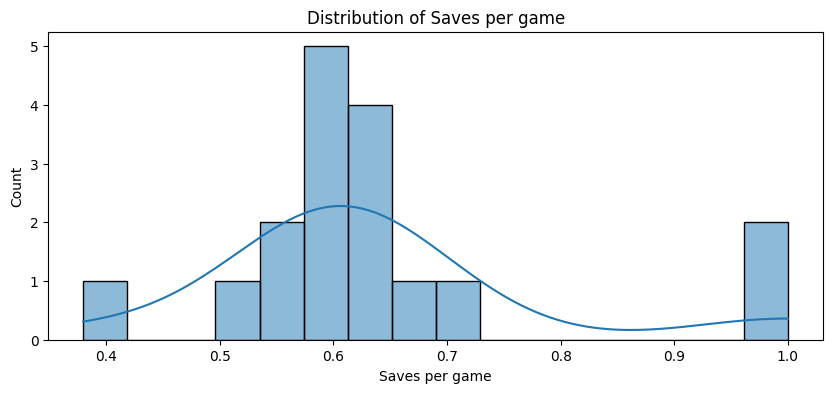

In [8]:
# Plotting histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

We can see a trend emerging; most of the histograms are of a negative distribution, with most of our local players generally doing relatively badly on these metrics.

Some of the exceptions are surprisingly in passing (accurate passes), which is positively skewed.

There are some more normal distributions, such as long ball accuracy, and total duels, aerial duels, and successful dribbles. These mostly come as a surprise, as these indicate some decent passing performances and defensive performances. However, our local games are particularly notable for high scoring matches, indicating defensive deficiencies. 

Another is the saves per game. The latter is actually not too suprising, as Singapore has historically had good keepers, many of which often make the our local headlines for impressive performances. Think: Izwan Mahbud's performance in 2015 at Saitama - Siege of Saitama. Or more recently, Hassan Sunny made the headlines for making countless saves in a World Cup qualifying game against Thailand, which inadvertently led to China qualifying for the next stage due to goal difference.

### Correlation Matrix

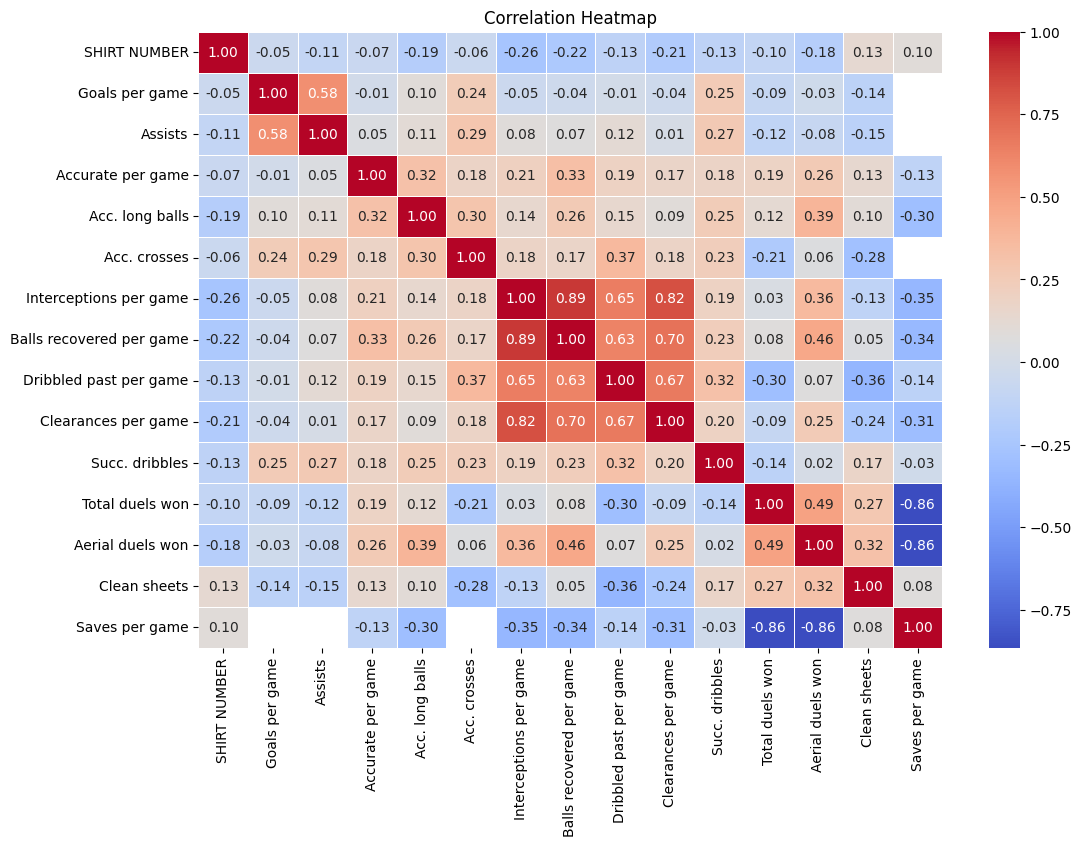

In [9]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

There are only a handful of strong correlations (> 0.7):

Positive: 
Interceptions and balls recovered
Interceptions and clearances

Negative:
Saves and total duels
Saves and aerial duels

Given that saves are a keeper only metric, and our past understanding that we have strong keepers, it is surprising that there is a large negative correlation, as I would expect our a keeper making many saves to also win duels. However, it could be simply that keepers are not making many duels the way outfielders do.

### Column Charts

We run some column charts to get a better understanding of Singaporean players.

In [10]:
# Checking unique values in each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Columns: {categorical_columns}")

for col in categorical_columns:
    unique_vals = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_vals}")


Categorical Columns: ['Player Name', 'NATIONALITY', 'HEIGHT', 'PREFERRED FOOT', 'POSITION']
Number of unique values in Player Name: 114
Number of unique values in NATIONALITY: 1
Number of unique values in HEIGHT: 29
Number of unique values in PREFERRED FOOT: 3
Number of unique values in POSITION: 4


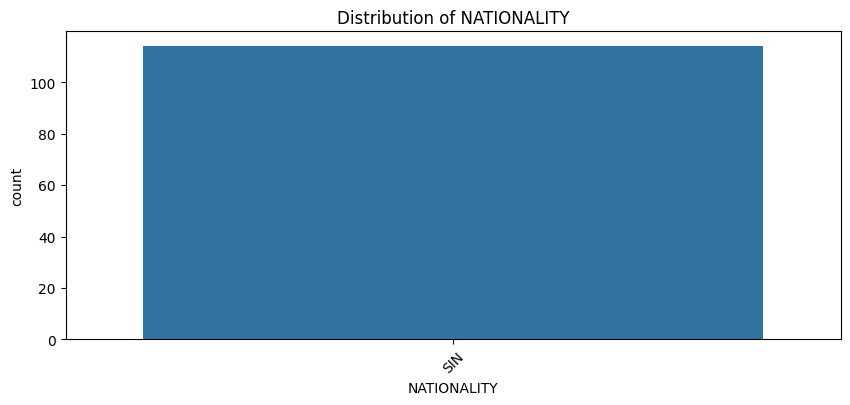

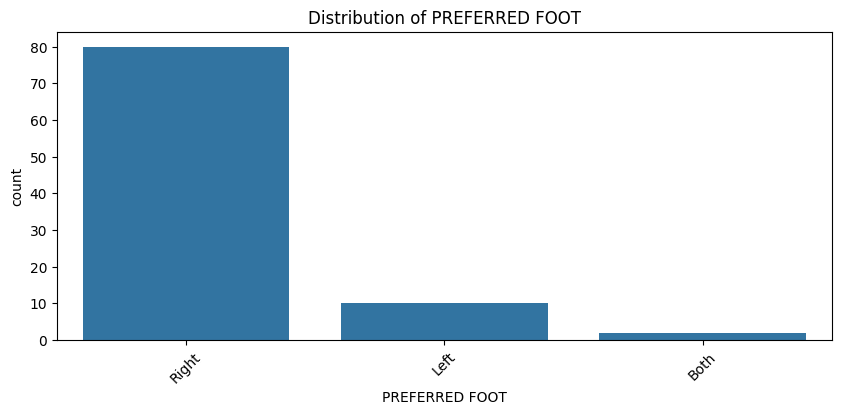

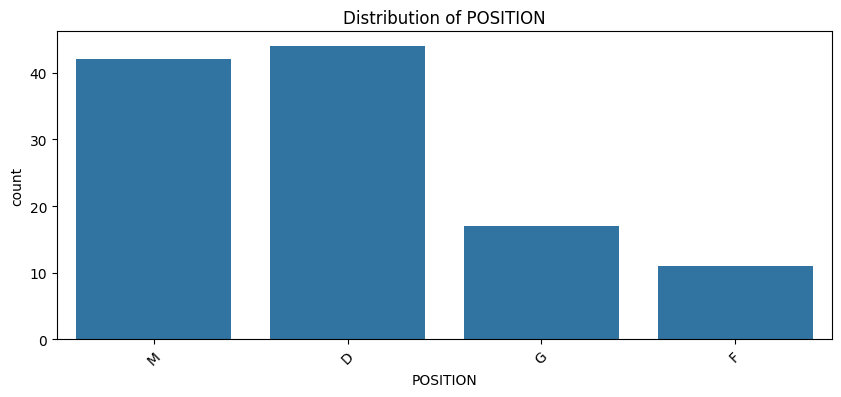

In [11]:
# Plotting bar plots for categorical columns (for less than 20 unique values)
for col in categorical_columns:
    if df[col].nunique() < 20:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

Again, some interesting things here.

Our players are overwhelmingly right footed. This indicates that we are are short on options for naturally left footed players to fill roles on the left side, e.g. left full back and left winger. This means that it is inevitable right footed players are filling in on the left side of the field.

Another key finding is that we have less "forwards" available in the talent pool than goalkeepers. Having said that, this can be explained by a few reasons:

1) Most of the clubs have taken to getting foreign players to fill striking roles, leaving little room for local players to take up forward positions.
2) This has led to trained strikers reinventing their game to fill roles further back, such as midfielders.

### Pairplots

We run pairplots to try to visualise the relationships between player stats.

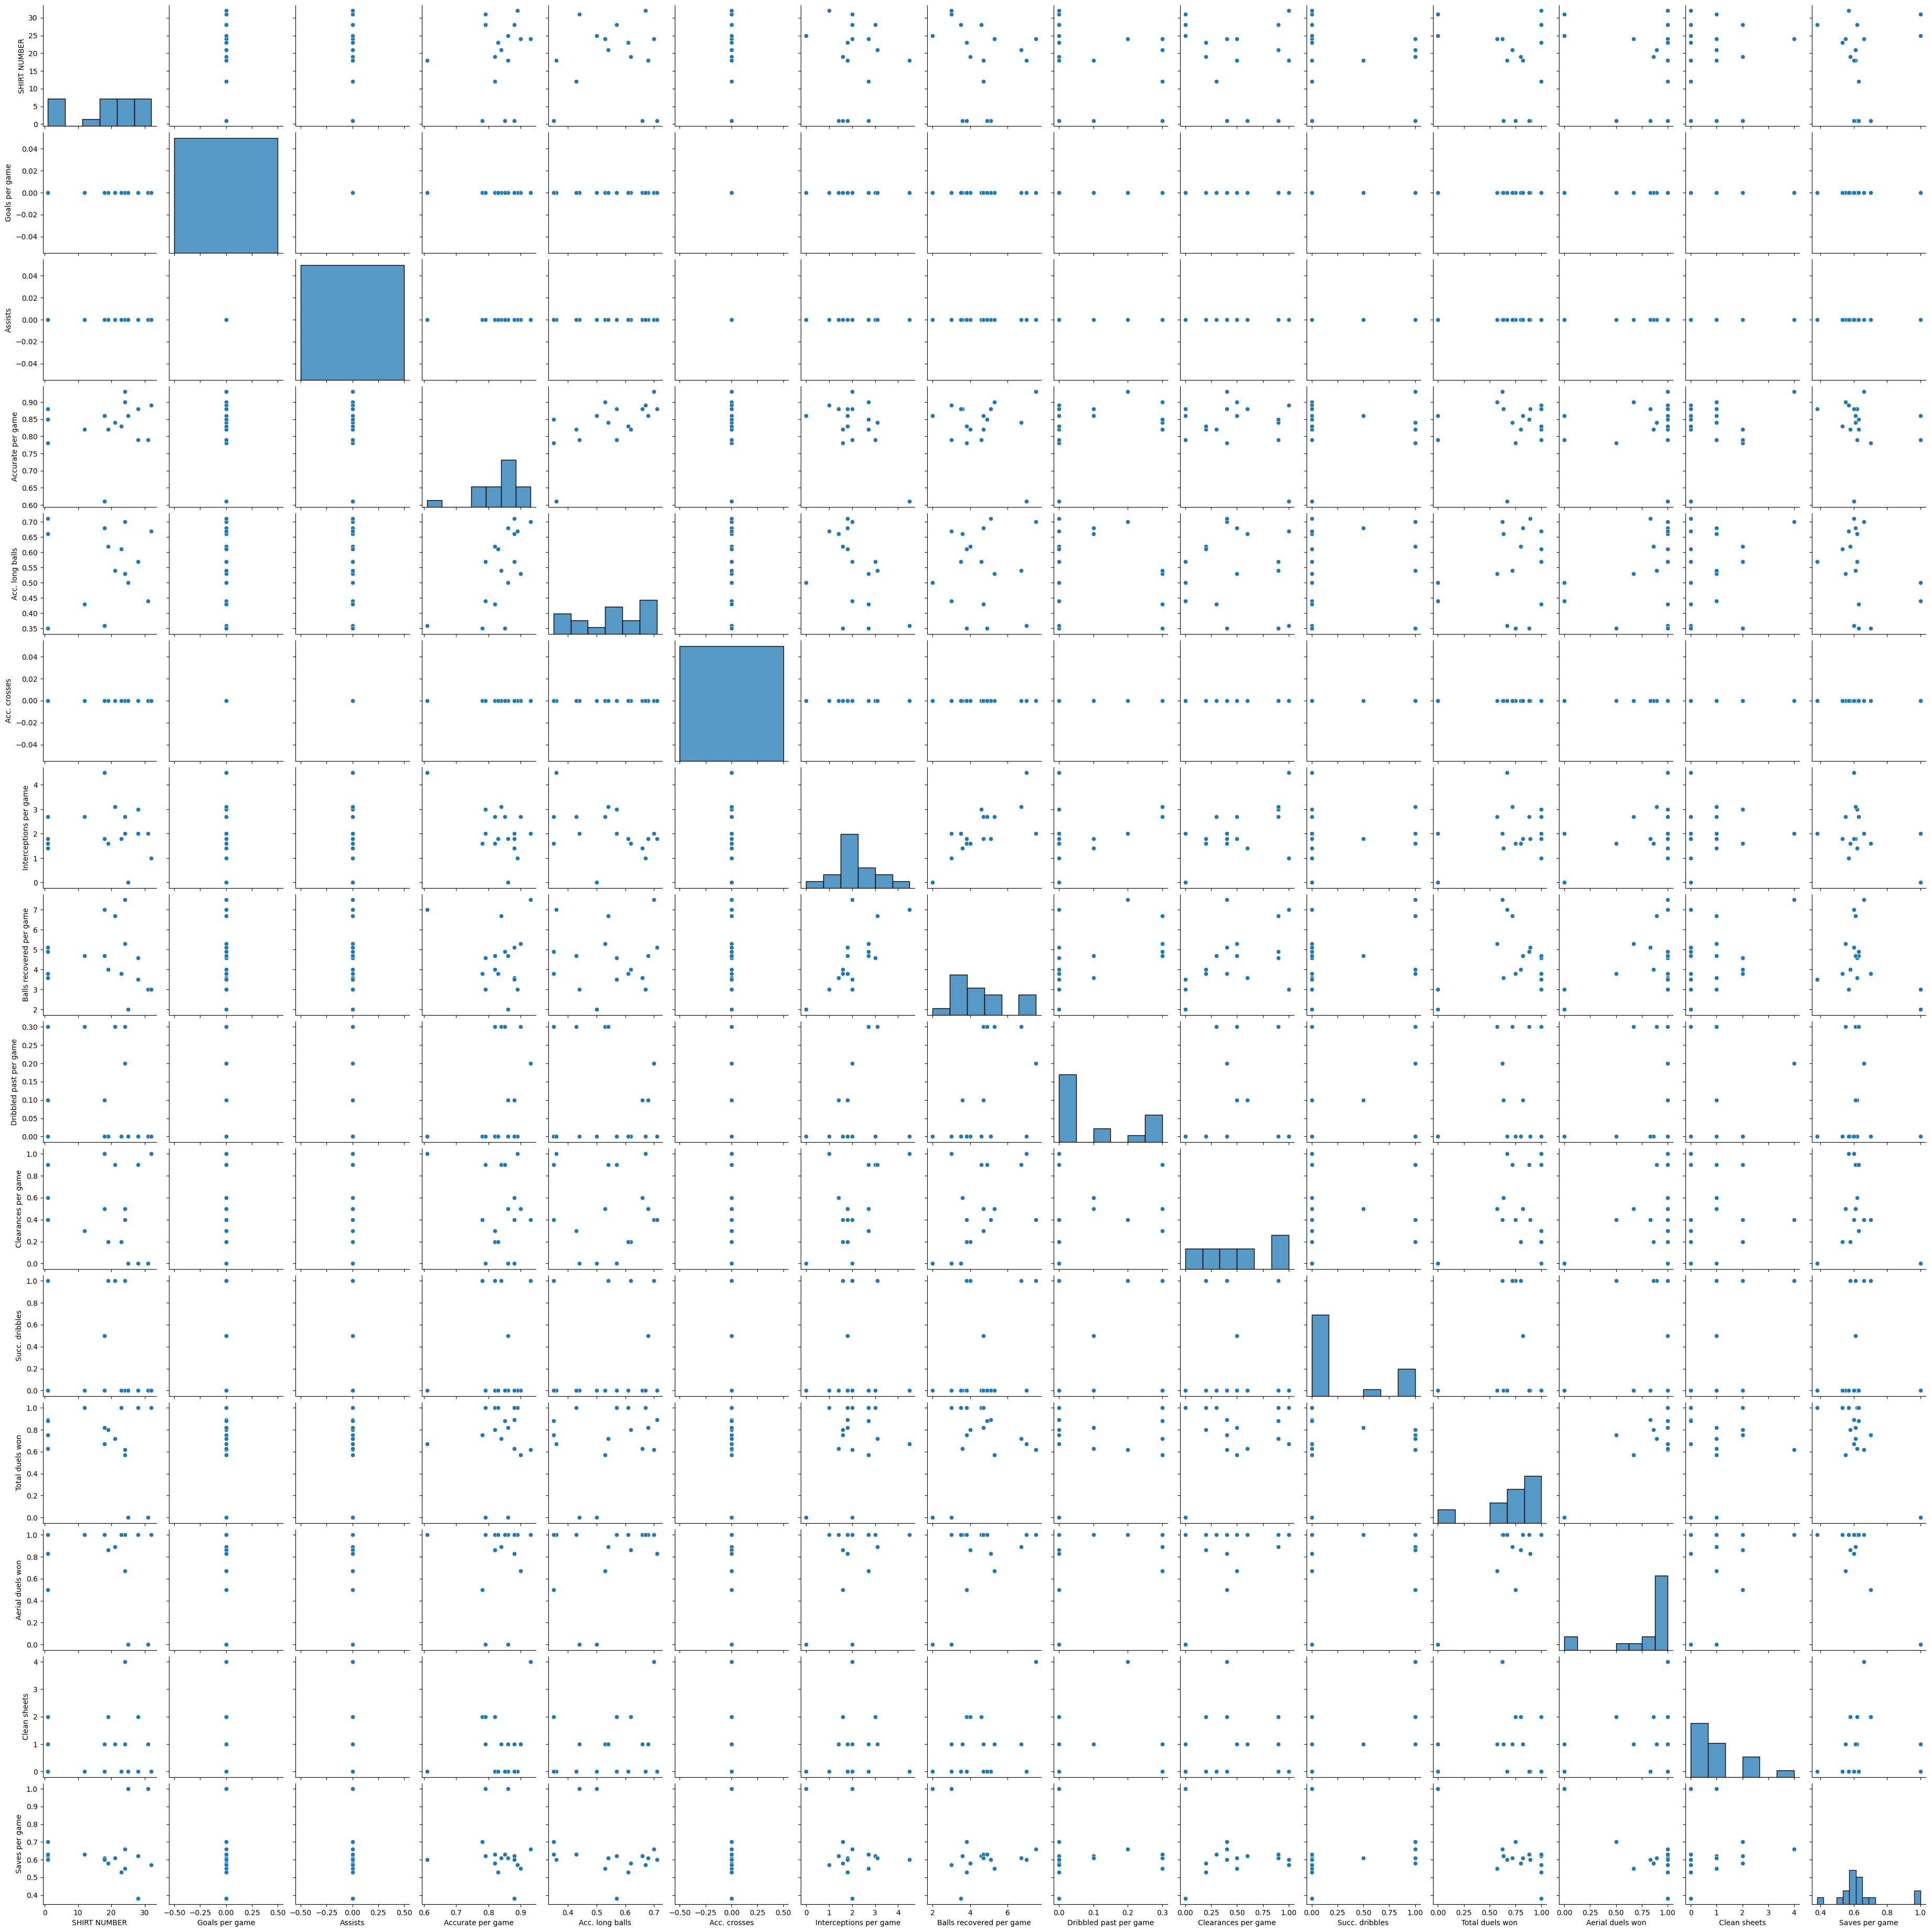

In [12]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[numerical_columns].dropna())
plt.show()


As previously established through the correlation heatmap, there is little pattern to the stats, which makes sense given they're mostly distinctly different stats. However, a deeper underlying problem might be that our local players are extremely limited and being good at only one thing in their roles.